<a href="https://colab.research.google.com/github/ikeasamoahansah/ey-uhi/blob/main/uhi_building_footprint_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import geopandas as gpd

In [22]:
ftrain = pd.read_csv('sub.csv')
bdin = gpd.read_file('Building_Footprint.kml')

In [23]:
ftrain.head()

,Longitude,Latitude,UHI Index
0,-73.971665,40.788763,NaN
1,-73.971928,40.788875,NaN
2,-73.967080,40.789080,NaN
3,-73.972550,40.789082,NaN
4,-73.969697,40.787953,NaN


In [24]:
bdin.head()

,Name,Description,geometry
0,,,"MULTIPOLYGON (((-73.91903 40.8482, -73.91933 4..."
1,,,"MULTIPOLYGON (((-73.92195 40.84963, -73.92191 ..."
2,,,"MULTIPOLYGON (((-73.9205 40.85011, -73.92045 4..."
3,,,"MULTIPOLYGON (((-73.92056 40.8514, -73.92053 4..."
4,,,"MULTIPOLYGON (((-73.91234 40.85218, -73.91247 ..."


In [25]:
bdin['area'] = bdin.geometry.area
bdin['perimeter'] = bdin.geometry.length
bdin['centroid'] = bdin.geometry.centroid

<ipython-input-25-c420dbebaf36>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bdin['area'] = bdin.geometry.area
<ipython-input-25-c420dbebaf36>:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bdin['perimeter'] = bdin.geometry.length
<ipython-input-25-c420dbebaf36>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bdin['centroid'] = bdin.geometry.centroid


In [26]:
uhi_gdf = gpd.GeoDataFrame(ftrain, geometry=gpd.points_from_xy(ftrain.Longitude, ftrain.Latitude))
uhi_gdf = uhi_gdf.set_crs(epsg=4326)

In [27]:
merged_gdf = gpd.sjoin(uhi_gdf, bdin, how='left')
merged_gdf.head()

,Longitude,Latitude,UHI Index,geometry,index_right,Name,Description,area,perimeter,centroid
0,-73.971665,40.788763,NaN,POINT (-73.97166 40.78876),NaN,NaN,NaN,NaN,NaN,None
1,-73.971928,40.788875,NaN,POINT (-73.97193 40.78888),NaN,NaN,NaN,NaN,NaN,None
2,-73.967080,40.789080,NaN,POINT (-73.96708 40.78908),5937.0,,,7.957885e-07,0.006426,POINT (-73.96766 40.78918)
3,-73.972550,40.789082,NaN,POINT (-73.97255 40.78908),NaN,NaN,NaN,NaN,NaN,None
4,-73.969697,40.787953,NaN,POINT (-73.9697 40.78795),NaN,NaN,NaN,NaN,NaN,None


In [28]:
merged_gdf.describe()

,Longitude,Latitude,UHI Index,index_right,area,perimeter
count,1040.000000,1040.000000,0.0,48.000000,4.800000e+01,48.000000
mean,-73.934816,40.807991,NaN,6964.854167,6.901823e-07,0.005230
std,0.028661,0.023200,NaN,1861.127707,3.538205e-07,0.002830
min,-73.993163,40.758877,NaN,1223.000000,1.512550e-08,0.000588
25%,-73.957030,40.790802,NaN,6123.750000,4.443570e-07,0.003824
50%,-73.934618,40.809553,NaN,7317.500000,7.911485e-07,0.004118
75%,-73.910655,40.823054,NaN,8265.000000,9.399020e-07,0.006672
max,-73.879537,40.859243,NaN,9308.000000,1.343797e-06,0.012344


In [29]:
merged_gdf.isna().sum()

,0
Longitude,0
Latitude,0
UHI Index,1040
geometry,0
index_right,992
Name,992
Description,992
area,992
perimeter,992
centroid,992


In [30]:
aggregated = merged_gdf.groupby('UHI Index').agg({
    'area': 'mean',
    'perimeter': 'mean'
}).reset_index()

In [31]:
finaldf = pd.merge(uhi_gdf, aggregated, on='UHI Index', how='left')

In [32]:
finaldf.head()

,Longitude,Latitude,UHI Index,geometry,area,perimeter
0,-73.971665,40.788763,NaN,POINT (-73.97166 40.78876),NaN,NaN
1,-73.971928,40.788875,NaN,POINT (-73.97193 40.78888),NaN,NaN
2,-73.967080,40.789080,NaN,POINT (-73.96708 40.78908),NaN,NaN
3,-73.972550,40.789082,NaN,POINT (-73.97255 40.78908),NaN,NaN
4,-73.969697,40.787953,NaN,POINT (-73.9697 40.78795),NaN,NaN


In [33]:
finaldf.tail()

,Longitude,Latitude,UHI Index,geometry,area,perimeter
1035,-73.919388,40.813803,NaN,POINT (-73.91939 40.8138),NaN,NaN
1036,-73.931033,40.833178,NaN,POINT (-73.93103 40.83318),NaN,NaN
1037,-73.934647,40.854542,NaN,POINT (-73.93465 40.85454),NaN,NaN
1038,-73.917223,40.815413,NaN,POINT (-73.91722 40.81541),NaN,NaN
1039,-73.911645,40.804402,NaN,POINT (-73.91164 40.8044),NaN,NaN


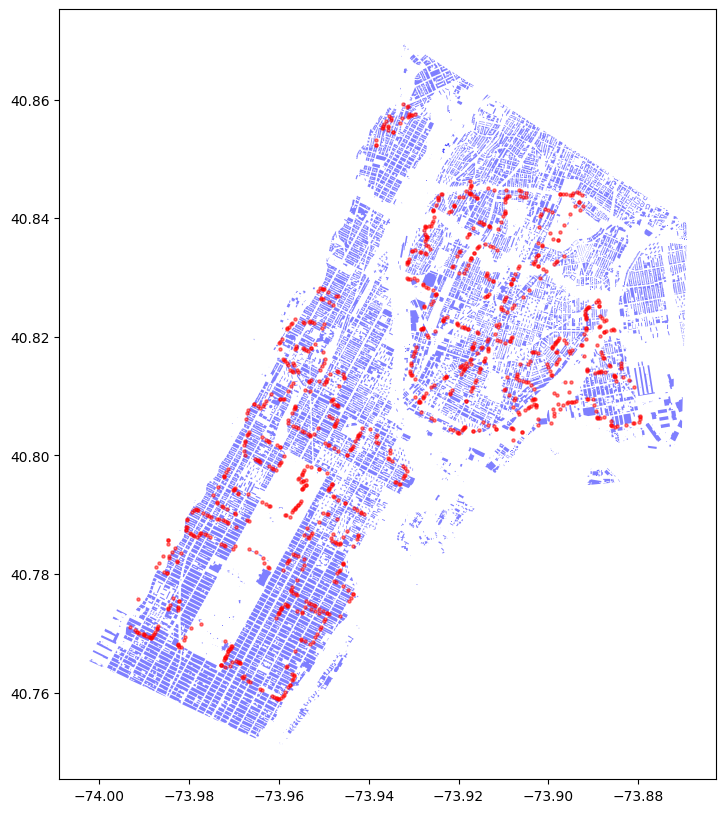

In [34]:
import matplotlib.pyplot as plt

bdin.plot(color='blue', alpha=0.5, figsize=(10, 10))

uhi_gdf.plot(ax=plt.gca(), color='red', markersize=5, alpha=0.5)

plt.show()

In [35]:
print(uhi_gdf.crs)
print(bdin.crs)

EPSG:4326
EPSG:4326


In [36]:
# Handling missing values in final dataset

finaldf['has_building'] = finaldf['area'].notna().astype(int)

finaldf['area'] = finaldf['area'].fillna(0)
finaldf['perimeter'] = finaldf['perimeter'].fillna(0)

In [37]:
finaldf.drop(columns=['geometry'], inplace=True)
finaldf.tail()

,Longitude,Latitude,UHI Index,area,perimeter,has_building
1035,-73.919388,40.813803,NaN,0.0,0.0,0
1036,-73.931033,40.833178,NaN,0.0,0.0,0
1037,-73.934647,40.854542,NaN,0.0,0.0,0
1038,-73.917223,40.815413,NaN,0.0,0.0,0
1039,-73.911645,40.804402,NaN,0.0,0.0,0


In [38]:
finaldf.to_csv('finalsub.csv')